In [2]:
import os
import pandas as pd
from exp_tools import *
import numpy as np

In [3]:
best_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
best_model_params_grid = {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }

In [4]:
df = load_instance("instance/auto-encoder/PMDI_imputed_ffill_mean_on_system_autoencoder.csv")
df_processed = preprocess(df)

In [5]:
(X_train_bin, X_test_bin, y_train_bin, y_test_bin,
 X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1930
           1       0.95      0.86      0.90        70

    accuracy                           0.99      2000
   macro avg       0.97      0.93      0.95      2000
weighted avg       0.99      0.99      0.99      2000



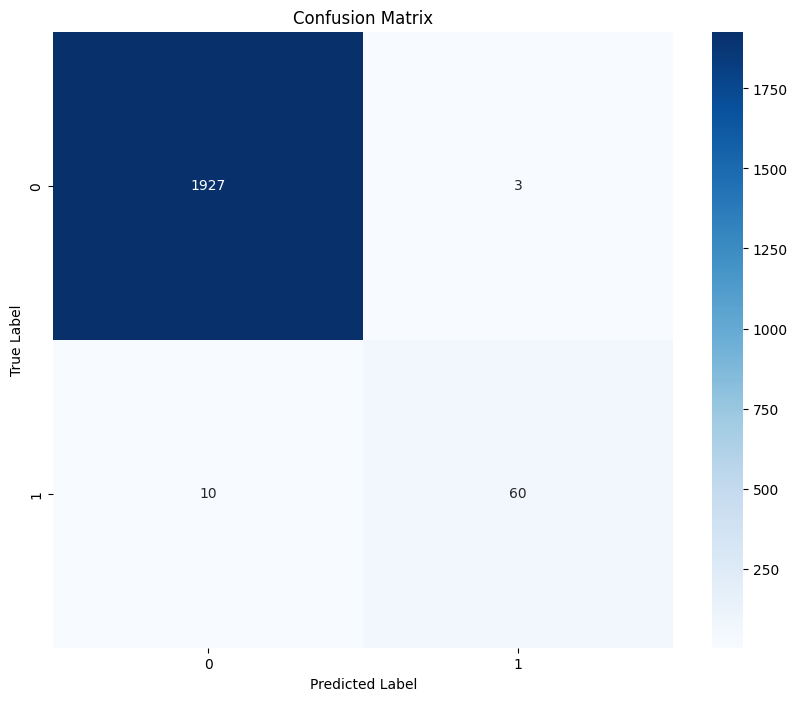

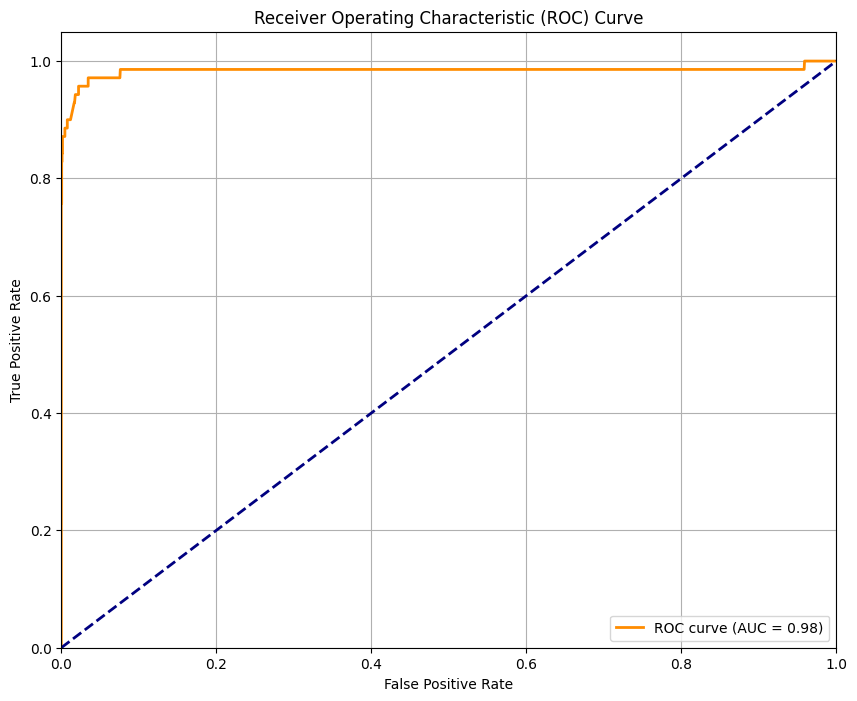

In [6]:
best_bin_model = specific_model_evaluation(best_model, best_model_params_grid, X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1930
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        17
           3       0.95      0.90      0.92        20
           4       0.25      0.12      0.17         8
           5       0.00      0.00      0.00         4

    accuracy                           0.99      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.99      0.99      0.99      2000



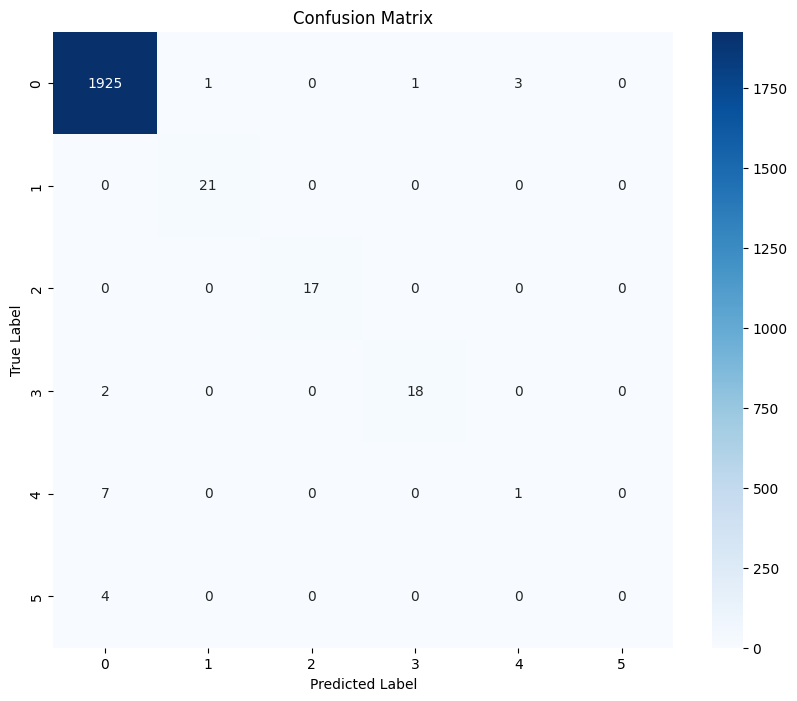

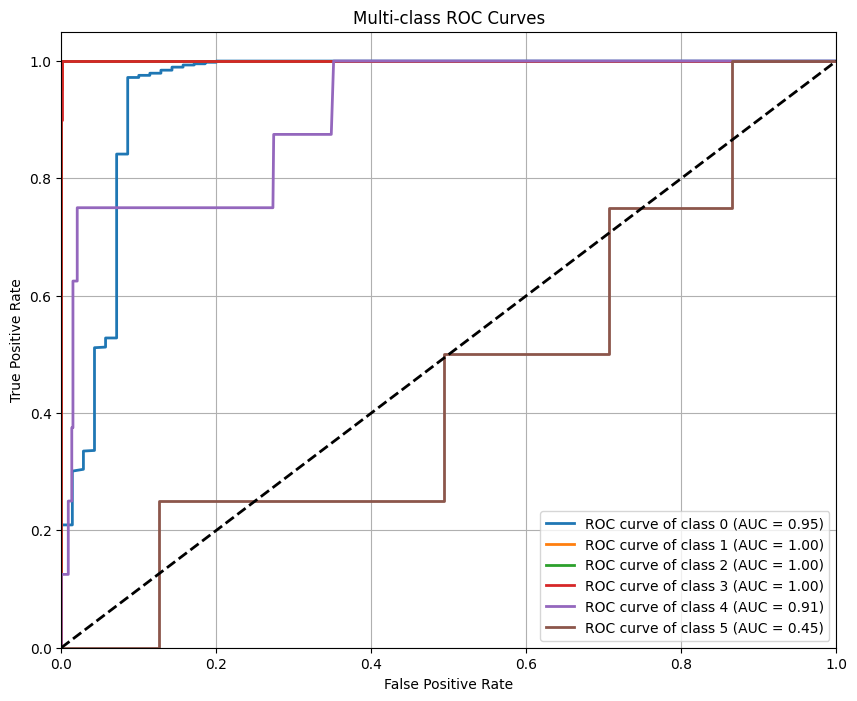

In [7]:
best_multi_model = specific_model_evaluation(best_model, best_model_params_grid, X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')

In [8]:
print(best_bin_model)
best_bin_model.save_model('best_predictive_bin_model')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [9]:
model = xgb.XGBClassifier()
model.load_model('best_predictive_bin_model')
model.predict_proba(X_test_bin)

array([[7.4325562e-02, 9.2567444e-01],
       [9.9671882e-01, 3.2811719e-03],
       [9.9913055e-01, 8.6945639e-04],
       ...,
       [9.7552764e-01, 2.4472384e-02],
       [7.3724347e-01, 2.6275653e-01],
       [9.9719423e-01, 2.8057510e-03]], shape=(2000, 2), dtype=float32)

In [10]:
print(best_multi_model)
best_multi_model.save_model('best_predictive_multi_model')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [11]:
model = xgb.XGBClassifier()
model.load_model('best_predictive_multi_model')
model.predict_proba(X_test_multi)

array([[9.8717334e-03, 1.9371815e-04, 1.4067856e-03, 9.8783547e-01,
        1.9949228e-04, 4.9278047e-04],
       [9.9953568e-01, 7.5042029e-05, 7.7576224e-05, 7.3603354e-05,
        7.7278863e-05, 1.6084700e-04],
       [9.9946600e-01, 1.4284065e-04, 6.7954759e-05, 6.4474632e-05,
        6.7694353e-05, 1.9110035e-04],
       ...,
       [9.8941225e-01, 9.0906499e-03, 2.5541513e-04, 2.4934334e-04,
        2.6179498e-04, 7.3060050e-04],
       [3.5541001e-01, 6.3598061e-01, 1.3775225e-03, 1.3447752e-03,
        1.4119295e-03, 4.4751409e-03],
       [9.9871314e-01, 9.3539071e-05, 9.6697826e-05, 9.1745693e-05,
        9.6327269e-05, 9.0860954e-04]], shape=(2000, 6), dtype=float32)

## Other Model

In [12]:
df = load_instance("instance/on_system/ffill/PMDI_imputed_ffill_mean_on_system.csv")
df_processed = preprocess(df)
(X_train_bin, X_test_bin, y_train_bin, y_test_bin,
 X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)



Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1930
           1       0.95      0.83      0.89        70

    accuracy                           0.99      2000
   macro avg       0.97      0.91      0.94      2000
weighted avg       0.99      0.99      0.99      2000



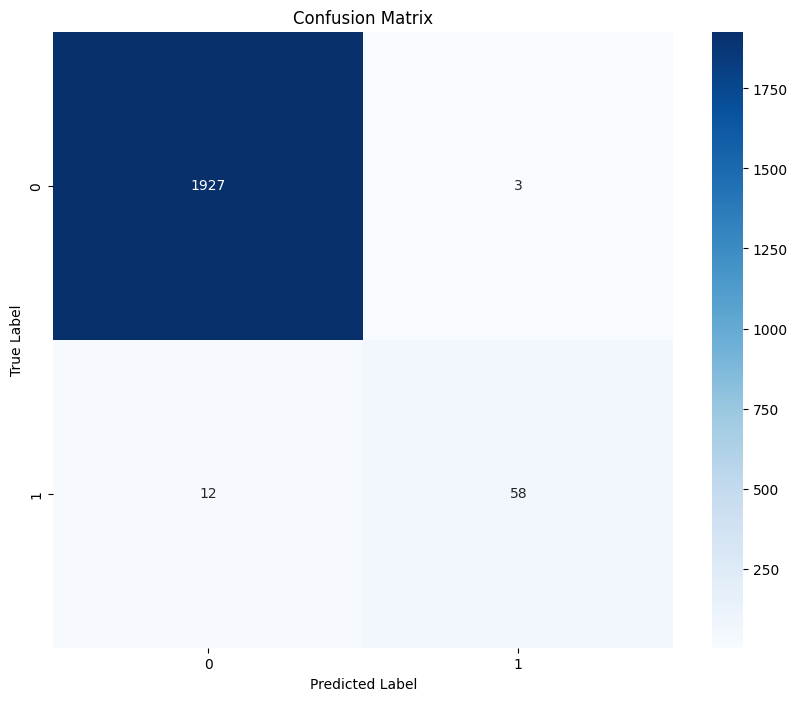

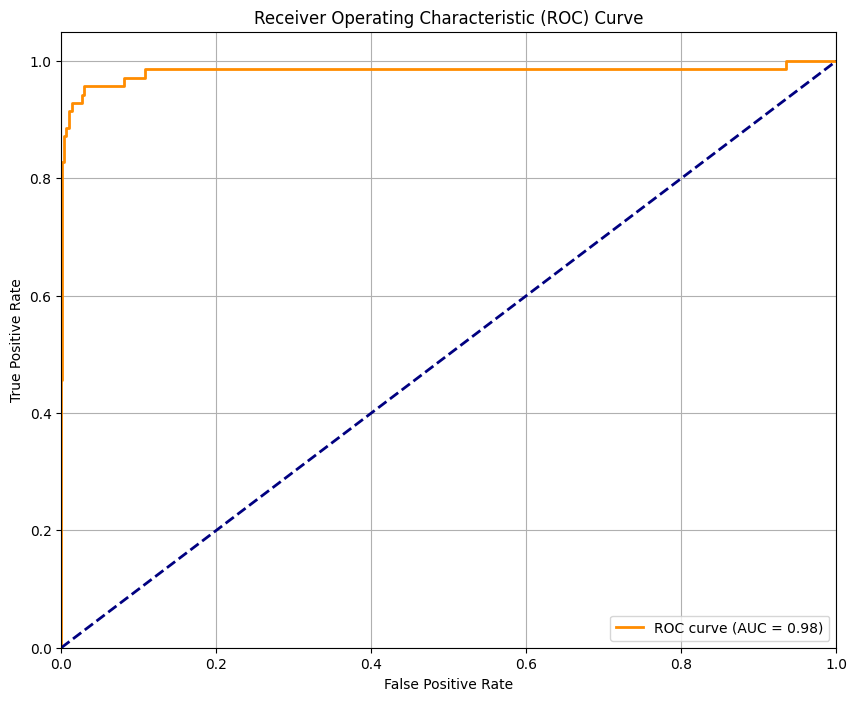

In [14]:
ffill_mean_bin_model = specific_model_evaluation(best_model, best_model_params_grid, X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1930
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        17
           3       0.95      0.95      0.95        20
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         4

    accuracy                           0.99      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.99      0.99      0.99      2000



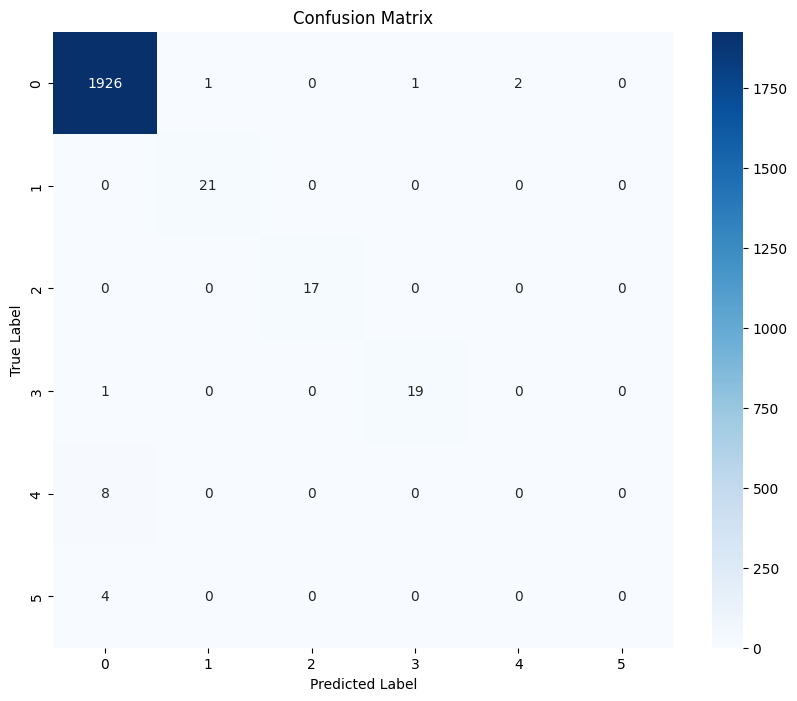

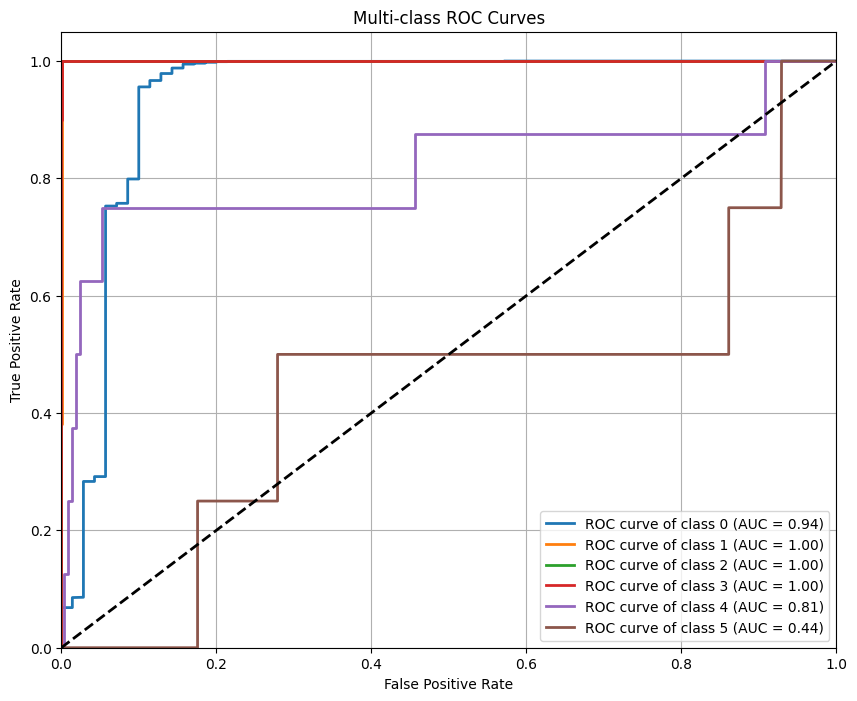

In [15]:
ffill_mean_multi_model = specific_model_evaluation(best_model, best_model_params_grid, X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')

In [16]:
ffill_mean_bin_model.save_model('ffill_mean_bin_model')
ffill_mean_multi_model.save_model('ffill_mean_multi_model')